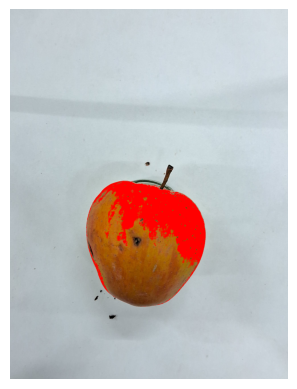

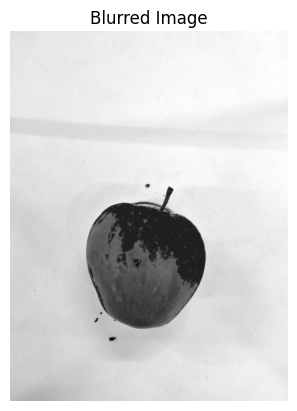

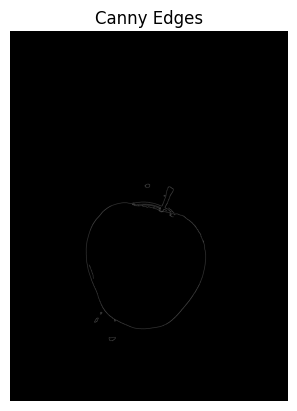

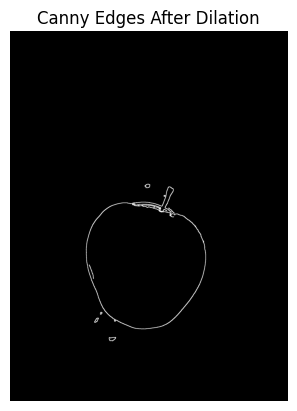

[[[1118 1098]]

 [[1117 1099]]

 [[1116 1100]]

 ...

 [[1121 1098]]

 [[1120 1098]]

 [[1119 1098]]]


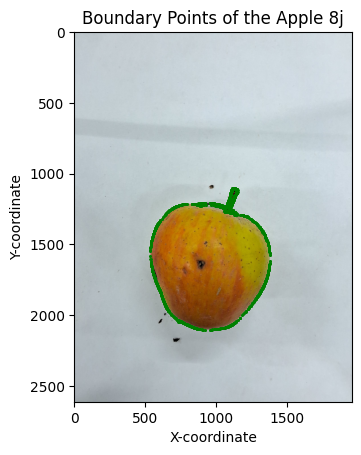

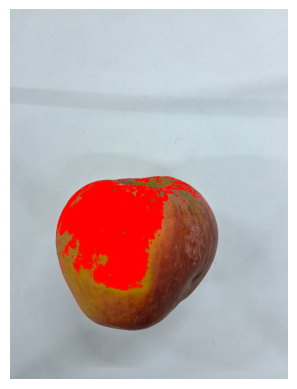

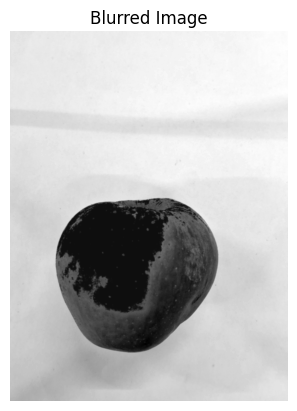

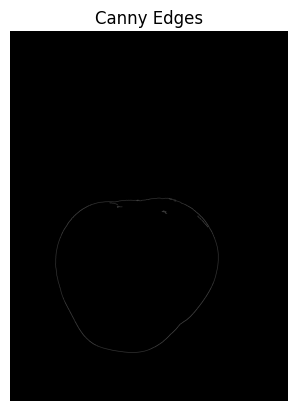

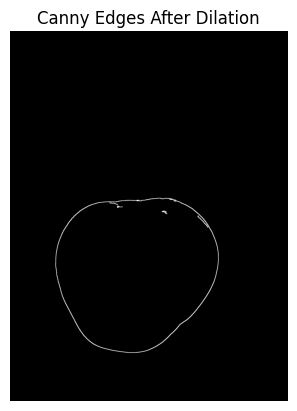

[[[1039 1178]]

 [[1038 1179]]

 [[1037 1179]]

 ...

 [[1042 1178]]

 [[1041 1178]]

 [[1040 1178]]]


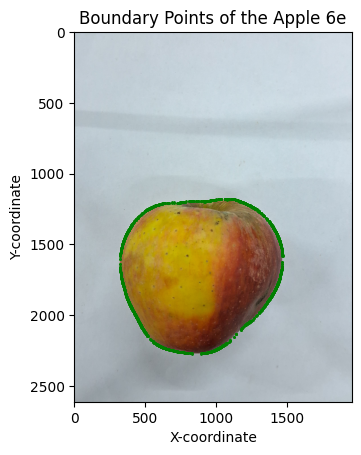

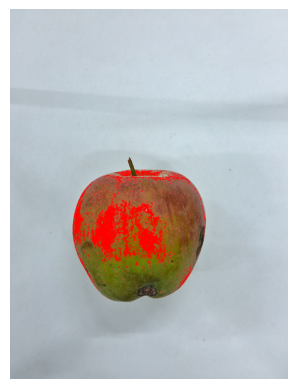

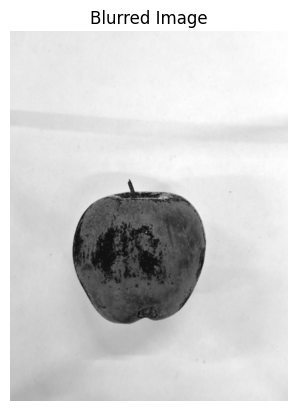

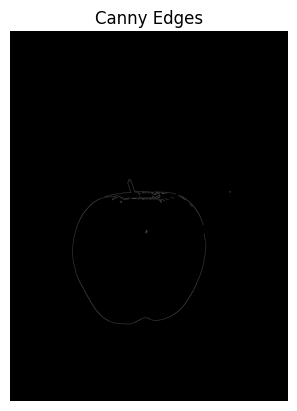

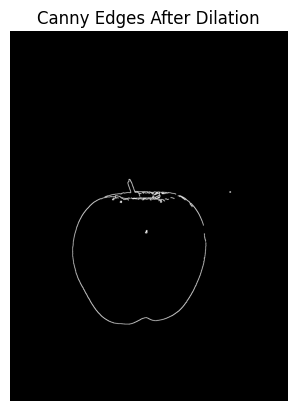

[[[ 838 1045]]

 [[ 837 1046]]

 [[ 837 1047]]

 ...

 [[ 841 1045]]

 [[ 840 1045]]

 [[ 839 1045]]]


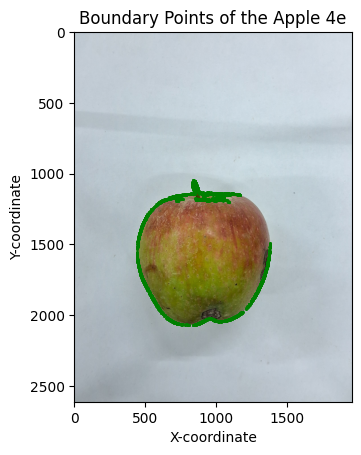

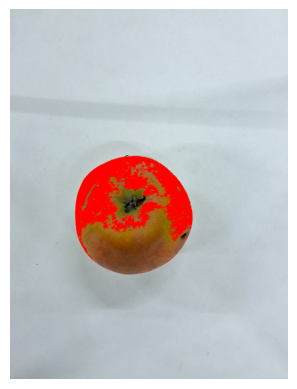

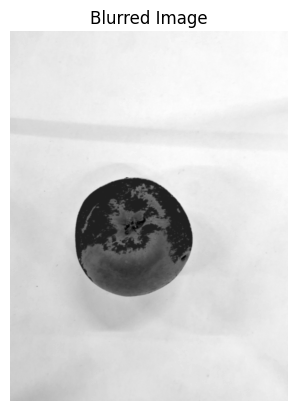

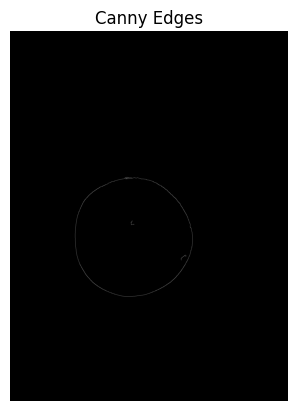

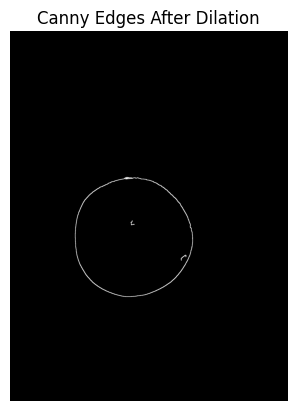

[[[ 820 1031]]

 [[ 819 1032]]

 [[ 818 1032]]

 ...

 [[ 823 1031]]

 [[ 822 1031]]

 [[ 821 1031]]]


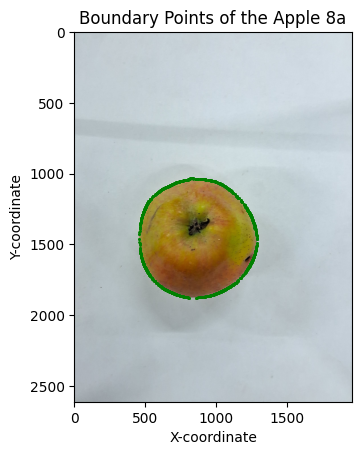

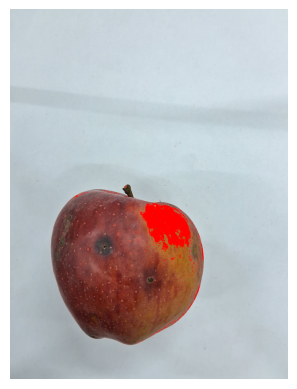

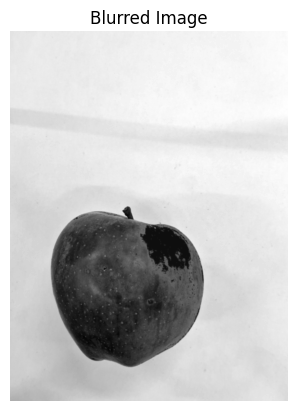

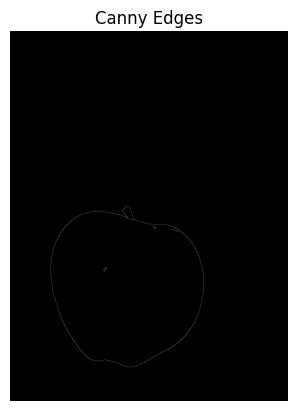

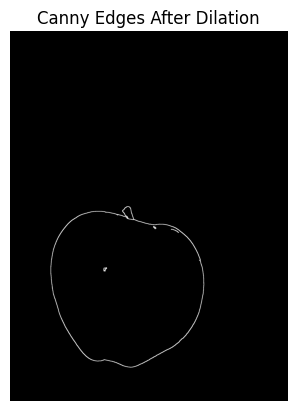

[[[ 827 1237]]

 [[ 826 1238]]

 [[ 825 1238]]

 ...

 [[ 830 1237]]

 [[ 829 1237]]

 [[ 828 1237]]]


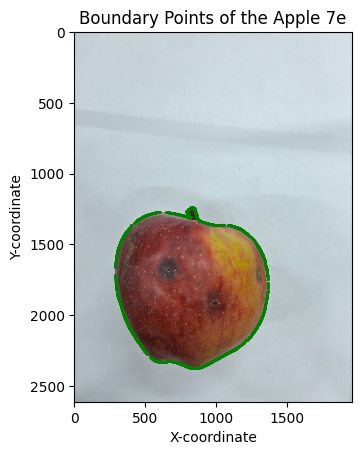

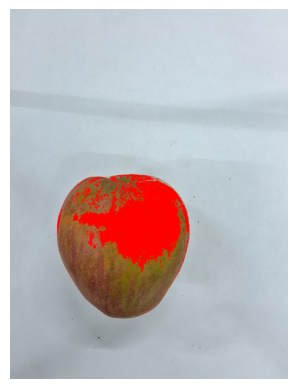

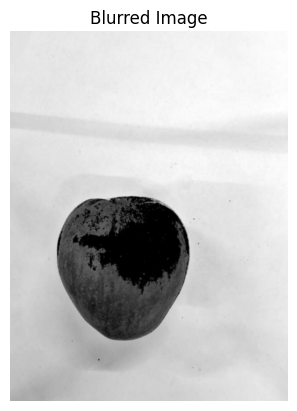

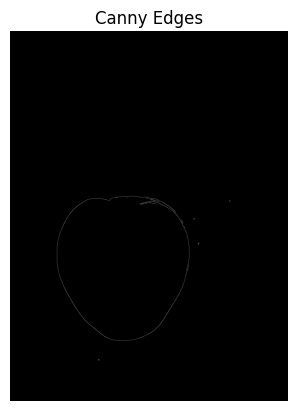

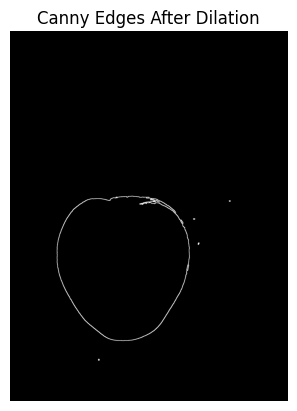

[[[ 852 1164]]

 [[ 851 1165]]

 [[ 850 1165]]

 ...

 [[ 855 1164]]

 [[ 854 1164]]

 [[ 853 1164]]]


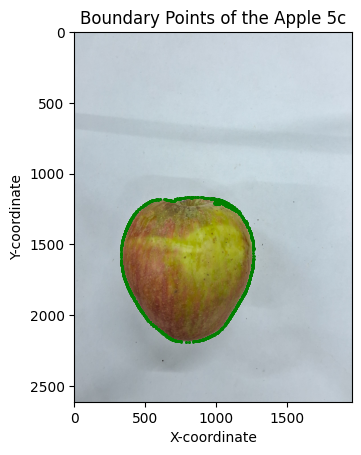

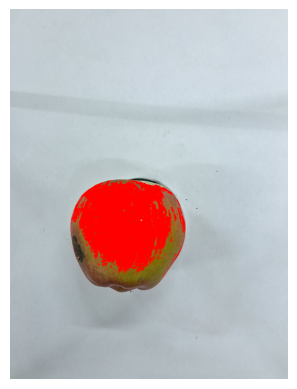

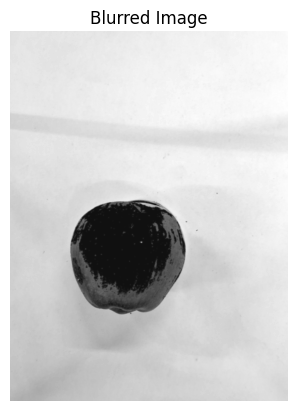

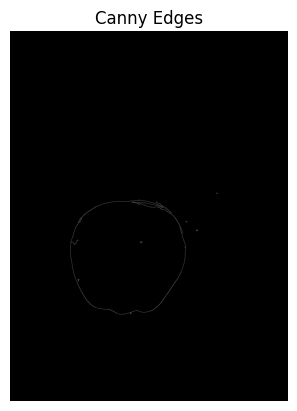

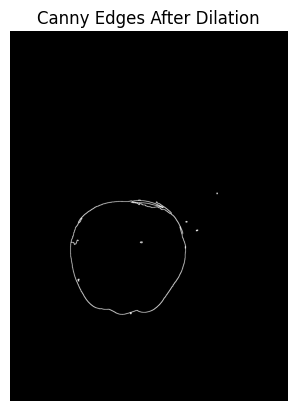

[[[ 906 1191]]

 [[ 905 1192]]

 [[ 904 1192]]

 ...

 [[ 909 1191]]

 [[ 908 1191]]

 [[ 907 1191]]]


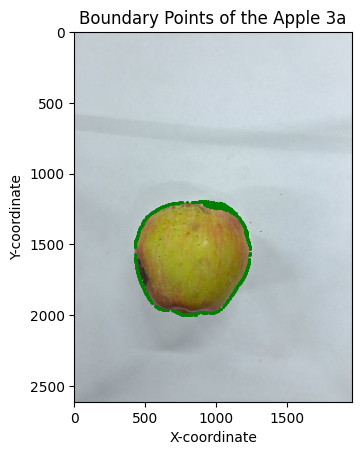

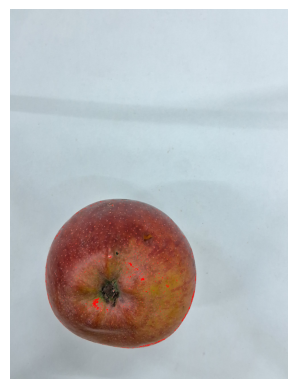

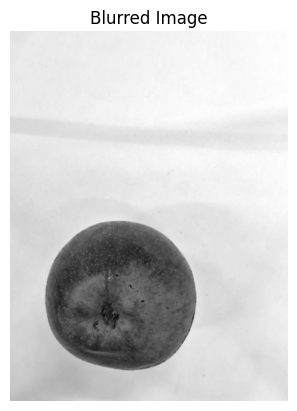

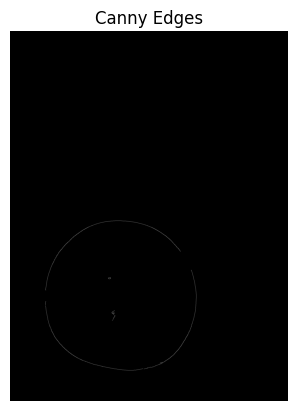

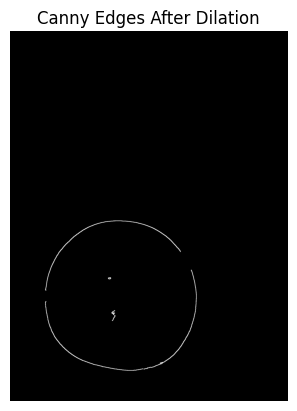

[[[ 731 1338]]

 [[ 730 1339]]

 [[ 729 1339]]

 ...

 [[ 734 1338]]

 [[ 733 1338]]

 [[ 732 1338]]]


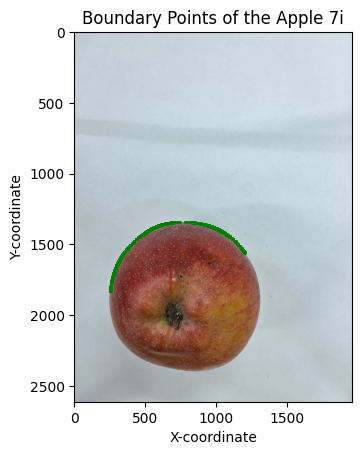

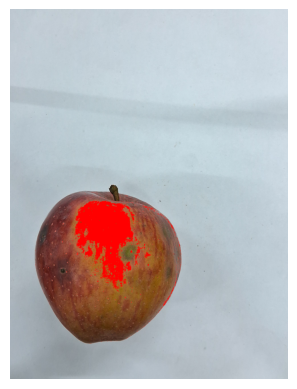

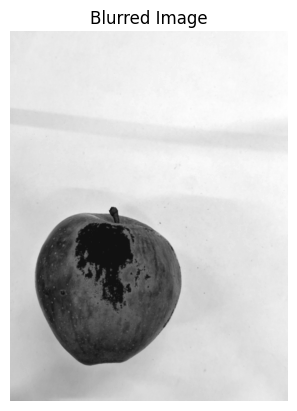

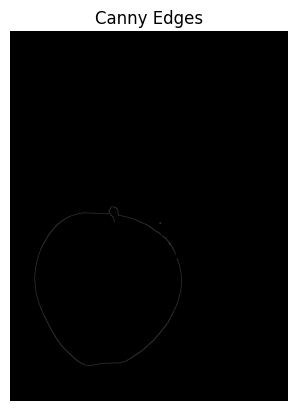

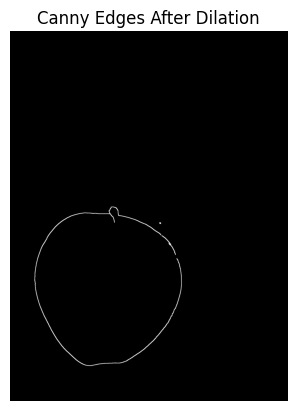

[[[ 715 1240]]

 [[ 714 1241]]

 [[ 713 1241]]

 ...

 [[ 718 1240]]

 [[ 717 1240]]

 [[ 716 1240]]]


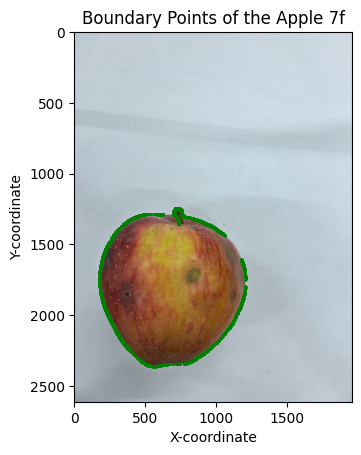

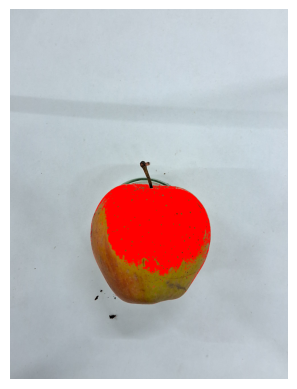

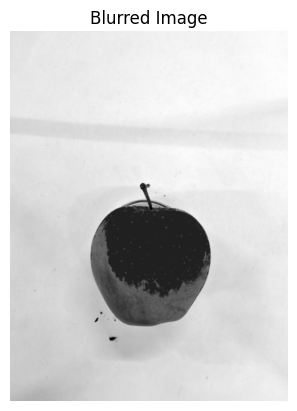

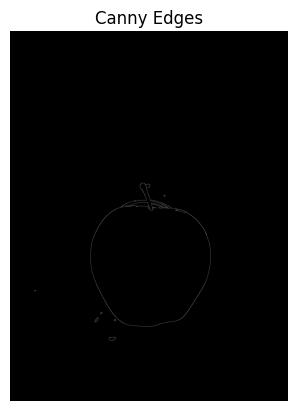

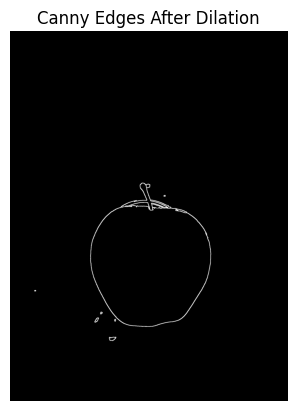

[[[ 932 1071]]

 [[ 931 1072]]

 [[ 930 1072]]

 ...

 [[ 935 1071]]

 [[ 934 1071]]

 [[ 933 1071]]]


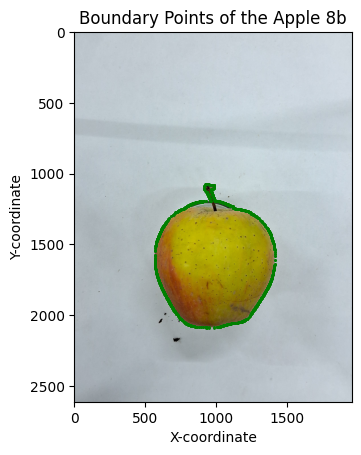

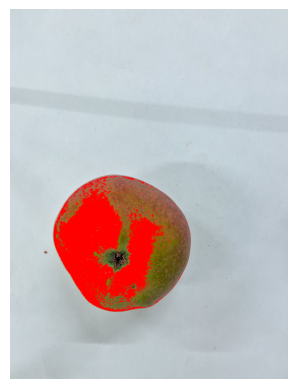

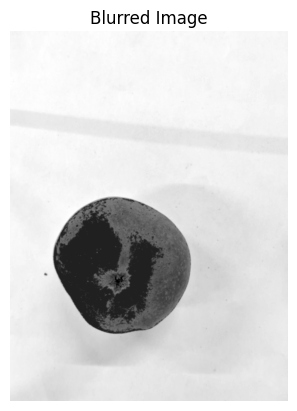

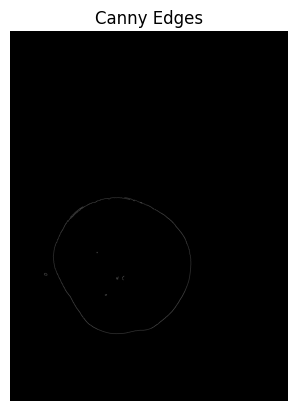

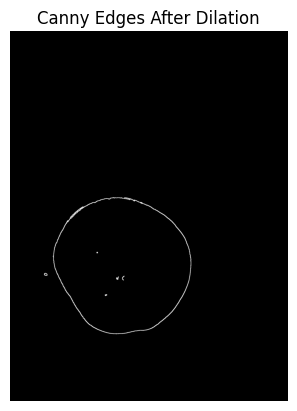

[[[ 728 1174]]

 [[ 727 1175]]

 [[ 726 1175]]

 ...

 [[ 731 1174]]

 [[ 730 1174]]

 [[ 729 1174]]]


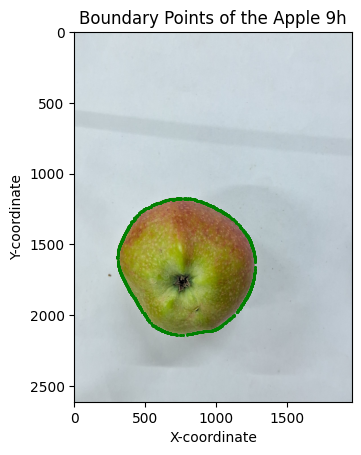

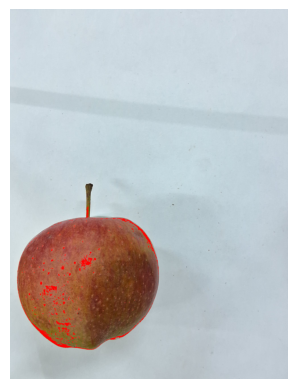

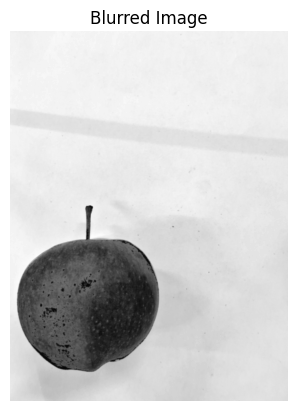

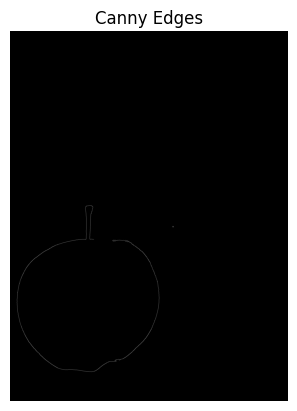

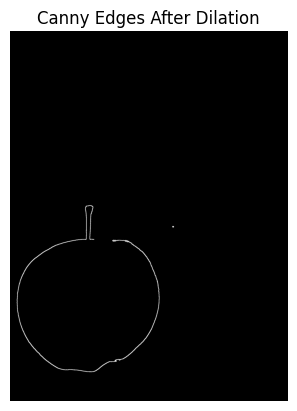

[[[ 558 1230]]

 [[ 557 1231]]

 [[ 556 1231]]

 ...

 [[ 561 1230]]

 [[ 560 1230]]

 [[ 559 1230]]]


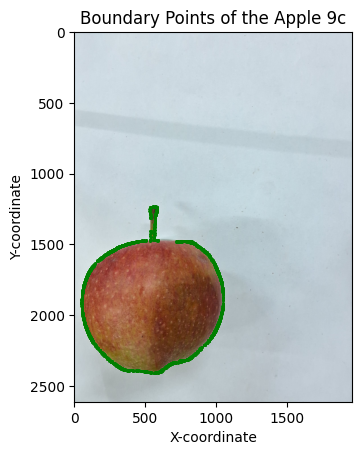

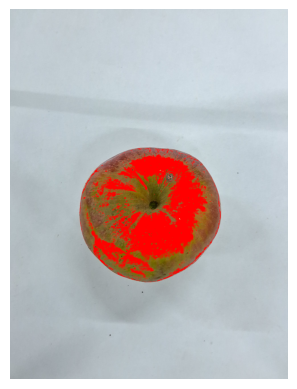

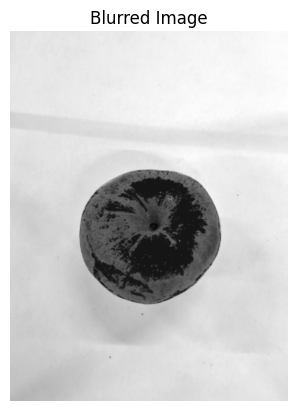

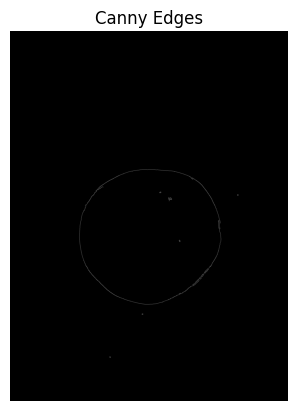

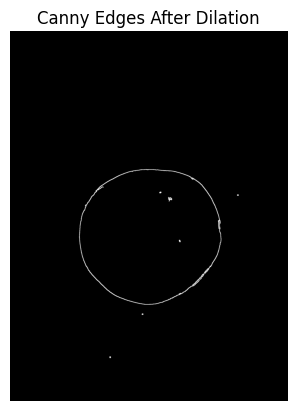

[[[958 975]]

 [[957 976]]

 [[956 976]]

 ...

 [[961 975]]

 [[960 975]]

 [[959 975]]]


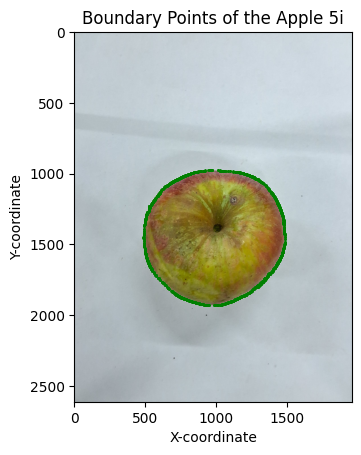

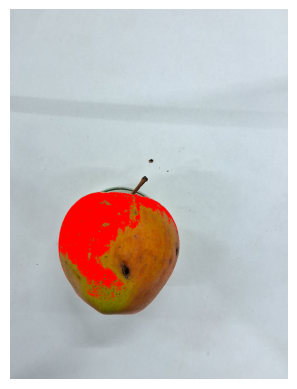

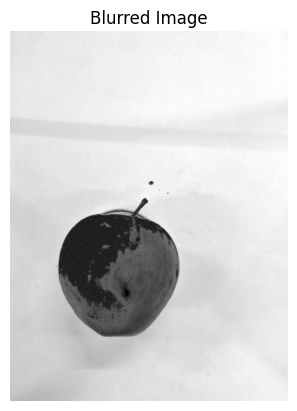

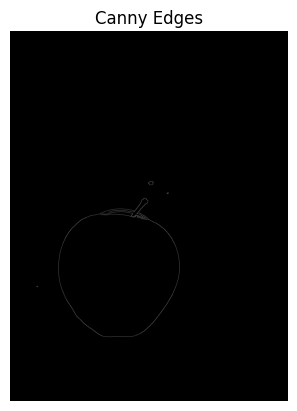

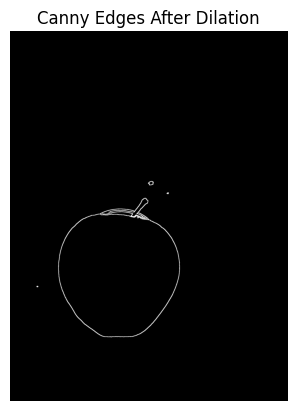

[[[ 950 1178]]

 [[ 949 1179]]

 [[ 948 1179]]

 ...

 [[ 953 1178]]

 [[ 952 1178]]

 [[ 951 1178]]]


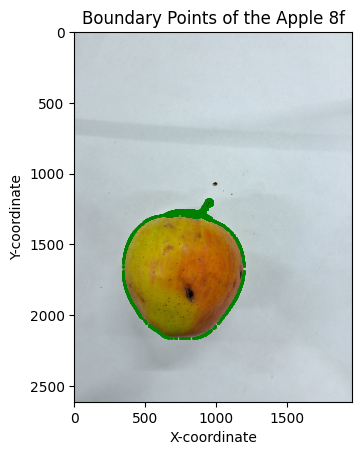

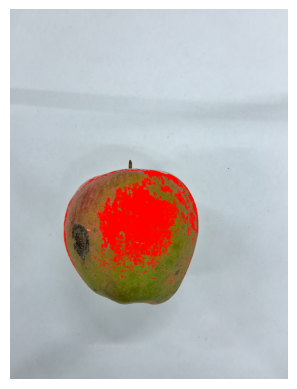

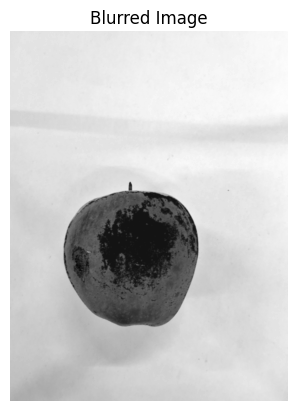

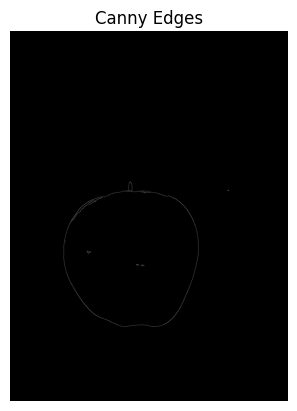

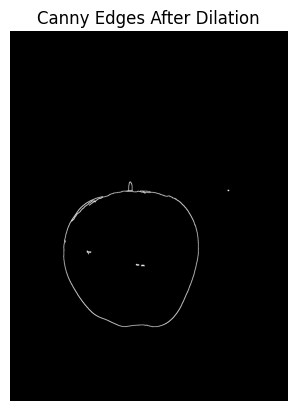

[[[ 846 1063]]

 [[ 845 1064]]

 [[ 844 1064]]

 ...

 [[ 849 1063]]

 [[ 848 1063]]

 [[ 847 1063]]]


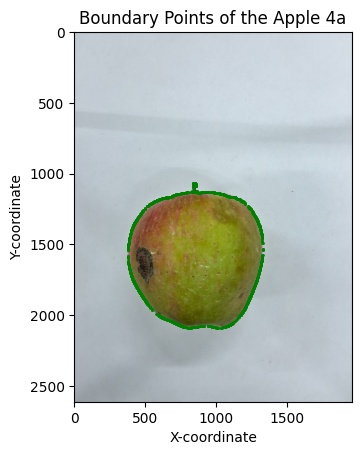

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

def print_image(pixel_intensity, cmap, title):
    plt.imshow(pixel_intensity, cmap=cmap)  
    plt.axis('off')  
    plt.title(title)
    plt.show()

def perform_dilation(edges, no_of_interation):
    # kernal for dilation
    kernel = np.ones((4,4), np.uint8)
    return cv2.dilate(edges, kernel, iterations=1)

def find_approx_contours(edges):
    _, binary_edges = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)

    # Find contours in the binary edge-detected image
    contours, _ = cv2.findContours(binary_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Find the contour with the largest area
    contour = max(contours, key=cv2.contourArea)
    # Approximate the contour to reduce the number of points
    epsilon = 0.00001 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    return approx

def print_apple_image_with_boundary_points(image, boundary_points, apple_label):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), origin='lower')
    plt.scatter(*zip(*boundary_points), color='green', s=1)
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to be equal
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title(f'Boundary Points of the Apple {apple_label}')
    plt.show()

def yellow_to_red_pixels(image):
    # Define the lower and upper bounds for the expanded yellow range in RGB
    lower_yellow = np.array([120, 120, 0])  # Lower bound for expanded yellow range
    upper_yellow = np.array([255, 255, 120])  # Upper bound for expanded yellow range
    
    # Define the RGB value for red
    red = np.array([255, 0, 0])  # RGB value for red
    
    # Mask for pixels within the expanded range of yellow
    yellow_mask = np.all((image >= lower_yellow) & (image <= upper_yellow), axis=-1)
    
    # Convert yellow pixels to red
    image_copy = np.copy(image)
    image_copy[yellow_mask] = red
    plt.imshow(image_copy)
    plt.axis('off')
    plt.show()
    return image_copy

# Function to find the boundary points of the apple in the image
def find_boundary_points(image_path):

    # # Loading and converting image to grayscale
    # image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to smooth the image with guassian kernal of 11*11, higher the kernal size that blurring effect will be more pronounced
    blurred = cv2.GaussianBlur(gray, (13, 13), 0)
    print_image(blurred, 'gray', 'Blurred Image')
    
    # Perform Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)
    print_image(edges, 'gray', 'Canny Edges')
    
    # kernal for dilation
    kernel = np.ones((3,3), np.uint8)
    edges = perform_dilation(edges, 1)
    print_image(edges, 'gray', 'Canny Edges After Dilation')

    approx = find_approx_contours(edges)
    # Convert the boundary points to a list of tuples
    boundary_points = [tuple(point[0]) for point in approx]
    return boundary_points

count = 0
directory = '../Dataset_Cropped'
for filename in os.listdir(directory):
    # print(os.path.join(directory, filename))
    if os.path.isfile(os.path.join(directory, filename)):
        filename = filename[:-4]
        if len(filename) != 2 or count >= 15:
            continue
        count+=1
        image_path = f'../Dataset_Cropped/{filename}.jpg'
        image = imread(image_path)
        image = yellow_to_red_pixels(image)
        boundary_points = find_boundary_points(image_path)
        image = cv2.imread(image_path)
        print_apple_image_with_boundary_points(image, boundary_points, filename)